# Decision Trees Workbook

## Digits dataset

In [2]:
%pylab inline
import numpy as np
import sklearn as sk

Populating the interactive namespace from numpy and matplotlib


In [3]:
""" Import digits dataset. """
# http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html
from sklearn.datasets import load_digits
digits = load_digits()

In [4]:
"""  Explore what type of data structure `digits` is. """
print(type(digits))
print(digits.keys())
print(type(digits.data))
print(digits.data[0].shape)
print(type(digits.images))
print(digits.images[0].shape)
# and the docs are here: `digits.DESCR`

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'DESCR', 'target', 'images', 'target_names'])
<class 'numpy.ndarray'>
(64,)
<class 'numpy.ndarray'>
(8, 8)


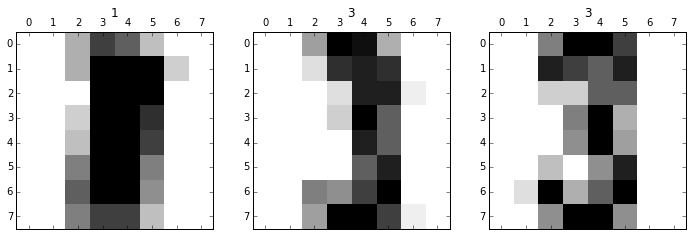

In [4]:
""" Plot 3 random digits. """
N = len(digits.data)
samples_to_show = np.random.randint(0,N,3)
f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
f.set_figwidth(12)
ax1.set_title(digits.target[samples_to_show[0]])
ax1.matshow(digits.images[samples_to_show[0]], cmap=cm.gray_r)

ax2.set_title(digits.target[samples_to_show[1]])
ax2.matshow(digits.images[samples_to_show[1]], cmap=cm.gray_r)

ax3.set_title(digits.target[samples_to_show[2]])
ax3.matshow(digits.images[samples_to_show[2]], cmap=cm.gray_r)

### Data munging challenges:

In [5]:
# what is the label of the 8th sample?

In [6]:
# what does that 8th sample look like?

In [7]:
# how many of each class are there?

In [8]:
# are the classes given sequentially, or in a random order?

## Decision Tree
* See [this notebook](http://nbviewer.ipython.org/github/TheGrimmScientist/SlidesFromTalks/blob/master/2014_10_15_DecisionTreeWorkshop/Presentation.ipynb#Decision-Trees-in-SKLearn:) for explanation on `dot` command

In [10]:
from sklearn import tree

In [11]:
""" Train decision tree on digits data set """
clf = tree.DecisionTreeClassifier(max_depth=2, criterion="entropy") # construct a decision tree.
clf.fit(digits.data,digits.target)  # train it on the dataset

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

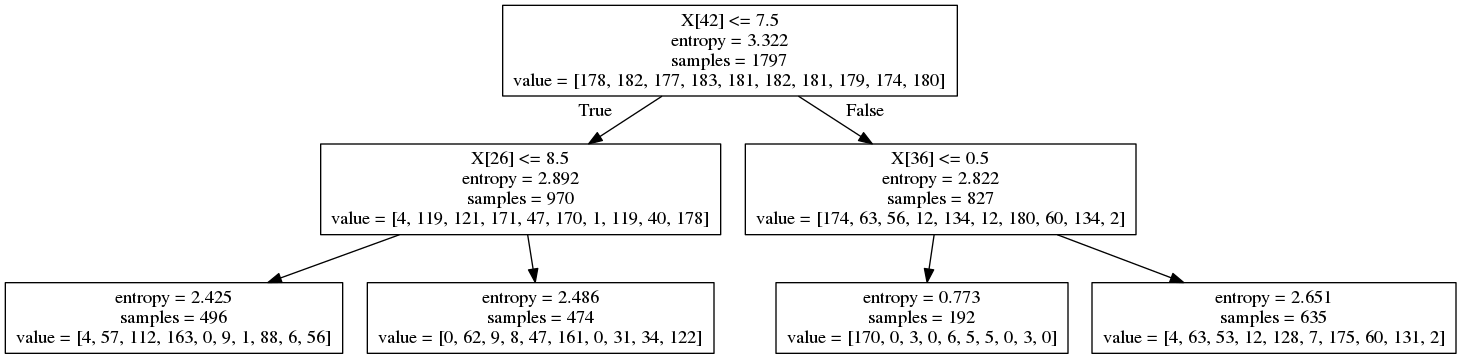

In [9]:
""" Print to file, and generate image of tree.  Be sure to have GraphViz installed."""
from IPython.display import Image
dot_file = tree.export_graphviz(clf, out_file='tree_d2_digits.dot')  #export the tree to .dot file
!dot -T png tree_d2_digits.dot -o tree_d2_digits.png
Image(filename='tree_d2_digits.png')

In [12]:
clf = tree.DecisionTreeClassifier(max_depth=2,criterion="entropy") # construct a decision tree.
clf.fit(digits.data,digits.target)  # train it on the dataset

features_used = [f for f in clf.tree_.feature if f != -2]

def convert_features_used_to_image_locations(features_used, clf):
    features_used_as_image = np.zeros(64)
    for f in features_used:
        features_used_as_image[f] += 1
    features_used_as_image = features_used_as_image.reshape((8,8))
    locations_of_decision_points = np.argwhere(features_used_as_image > 0)
    return [features_used_as_image, locations_of_decision_points]

[features_used_as_image, locations_of_decision_points] = convert_features_used_to_image_locations(features_used, clf)
print locations_of_decision_points

[[3 2]
 [4 4]
 [5 2]]


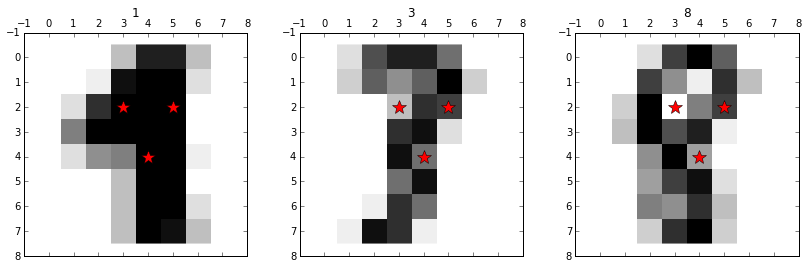

In [13]:
""" Plot 3 random digits, with decision boundaries labeled. """

def plot_decision_points_on_image(ax, features_used_as_image, locations_of_decision_points):
    [ax.plot(x,y,'r*', ms=15*features_used_as_image[x,y]) for [x,y] in locations_of_decision_points]

N = len(digits.data)
samples_to_show = np.random.randint(0,N,3)
f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
f.set_figwidth(14)
ax1.set_title(digits.target[samples_to_show[0]])
ax1.matshow(digits.images[samples_to_show[0]], cmap=cm.gray_r)
plot_decision_points_on_image(ax1, features_used_as_image, locations_of_decision_points)

ax2.set_title(digits.target[samples_to_show[1]])
ax2.matshow(digits.images[samples_to_show[1]], cmap=cm.gray_r)
plot_decision_points_on_image(ax2, features_used_as_image, locations_of_decision_points)

ax3.set_title(digits.target[samples_to_show[2]])
ax3.matshow(digits.images[samples_to_show[2]], cmap=cm.gray_r)
plot_decision_points_on_image(ax3, features_used_as_image, locations_of_decision_points)

## Challenges:

In [15]:
# Sample data into a Train/test split.  (careful so all classes are represented in both data sets)
#  (traditionally, 50-70% of data goes to training)
#  ( http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html )

In [ ]:
# Does your depth=2 decision tree find the same decision boundaries?

In [ ]:
# Plot the performance on train and test sets (as told by clf.score(X,Y)) across a range of depths

In [ ]:
# Which depth is best?

## Other Datasets:
* "the" MNIST [handwritten digits dataset](http://yann.lecun.com/exdb/mnist/)
* [Housing Prices](http://www.cs.toronto.edu/~delve/data/census-house/desc.html)